In [8]:
# !pip install --upgrade fastai 

In [1]:
from fastai.vision.all import *

In [2]:
path = Path('../input/intel-image-classification')
Path.BASE_PATH = path
path.ls()

(#3) [Path('seg_train'),Path('seg_pred'),Path('seg_test')]

In [3]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  get_y = parent_label,
                  splitter=GrandparentSplitter(train_name='seg_train',valid_name='seg_test'),
                  item_tfms=Resize(150))

In [4]:
dls = dblock.dataloaders(path)

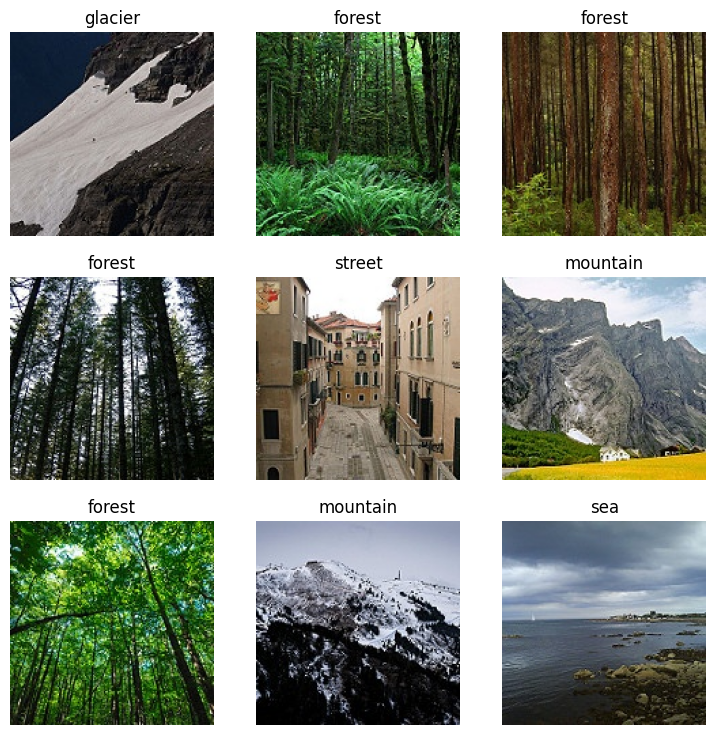

In [5]:
dls.show_batch()

In [6]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(2)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 284MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.528743,0.331620,0.888333,08:30


epoch,train_loss,valid_loss,accuracy,time
0,0.290573,0.215653,0.925667,10:39
1,0.132623,0.200184,0.930333,10:41


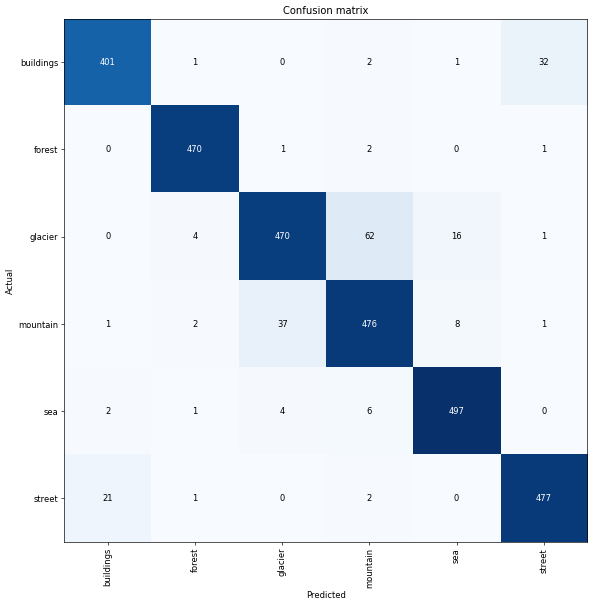

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [8]:
interp.most_confused(5)

[('glacier', 'mountain', 62),
 ('mountain', 'glacier', 37),
 ('buildings', 'street', 32),
 ('street', 'buildings', 21),
 ('glacier', 'sea', 16),
 ('mountain', 'sea', 8),
 ('sea', 'mountain', 6)]